<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-First-Repo/blob/main/Regression_of_Old_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
#import simple imputer from sckikit learn
from sklearn.impute import SimpleImputer
#import test train split
from sklearn.model_selection import train_test_split
#import onehot incoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [152]:
train_data = pd.read_csv('train.csv', index_col='id')
test_data = pd.read_csv('test.csv')

In [153]:
train_data.isna().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


In [154]:
train_y = train_data.price
train_x = train_data.drop(['price'], axis=1)

In [155]:
train_x.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes


In [156]:
train_x.nunique()

,0
brand,57
model,1897
model_year,34
milage,6651
fuel_type,7
engine,1117
transmission,52
ext_col,319
int_col,156
accident,2


In [175]:
train_x_uniques = {x: train_x[x].nunique() for x in train_x.columns}
train_x_uniques

{'brand': 57,
 'model': 1897,
 'model_year': 34,
 'milage': 6651,
 'fuel_type': 7,
 'engine': 1117,
 'transmission': 52,
 'ext_col': 7,
 'int_col': 8,
 'accident': 2,
 'clean_title': 1}

In [172]:
train_x.int_col.replace('Grey', 'Gray')
colors = train_x.int_col.value_counts().head(7).index

def recolor(color_column):
    for color in colors:
        if color in color_column or color.upper() in color_column:
            return color
    return 'Other'

train_x.int_col = train_x.int_col.apply(recolor)

<Axes: xlabel='ext_col'>

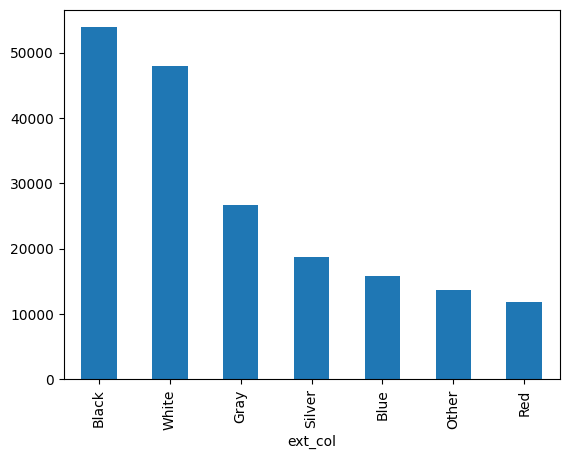

In [166]:
train_x['ext_col'].value_counts().plot(kind='bar')

In [174]:
train_x.int_col.replace('-', 'Other')

,int_col
id,
0,Gray
1,Beige
2,Gray
3,Black
4,Beige
...,...
188528,Beige
188529,Black
188530,Black


In [170]:
train_x.fuel_type.replace('-', 'NaN')
train_x.fuel_type.isna().sum()

5083